# Visualization and plotting using Pandas and Matplotlib

Pandas integrates seamlessly with popular visualization libraries like Matplotlib and Seaborn, allowing you to create insightful visualizations directly from your data. You can plot Series data using built-in plotting functions, customize plot aesthetics, and generate complex plots from DataFrame structures, enabling effective communication of insights derived from your analysis.

First things first: ensure matplotlib is installed using:
***pip install matplotlib***

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## 1. Matplotlib background information

**Matplotlib** graphs your data on **Figures** (e.g., windows, Jupyter widgets, etc.), each of which can contain:
* One or more Axes: an area where points can be specified in terms of x-y(-z) coordinates

The simplest way of creating a Figure with an Axes is using pyplot.subplots. We can then use Axes.plot to draw some data on the Axes:

**Let's create a figure with one axes** 

As we do not specify any other information or data, the figure is still empty.

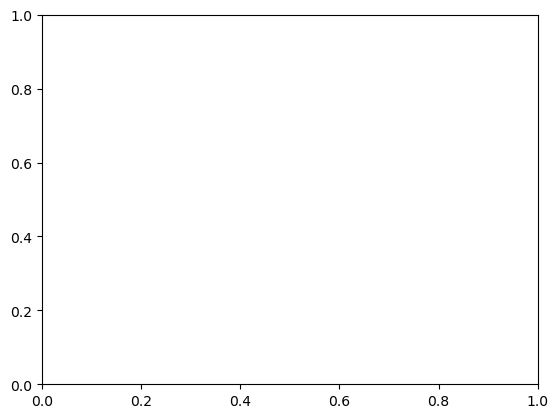

In [2]:
# A figure with one axes
fig, ax = plt.subplots()

**Let's add some data to the plot.**
You will see that the axes ticks adapt to the values of the data.

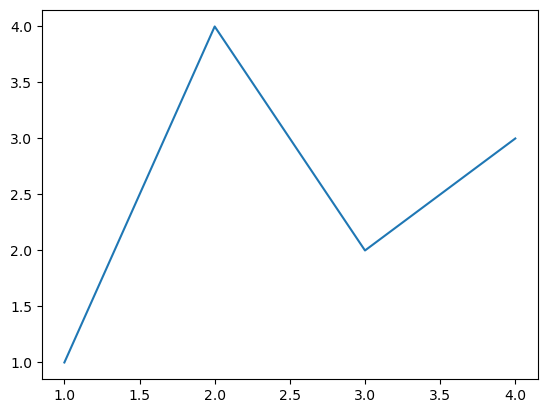

In [3]:
#add data
fig, ax = plt.subplots()
ax.plot([1,2,3,4],[1,4,2,3])
#plt.show()

### 1.1 The building blocks of matplotlib

#### Figure
A figure keeps track of 
* all the child axes
* a group of 'special' Artists (titles, figure legends, colorbars etc.)
* nested subfigures

Easiest way to create a new Figure is with pyplot:

In [4]:
fig = plt.figure()  # an empty figure with no Axes

<Figure size 640x480 with 0 Axes>

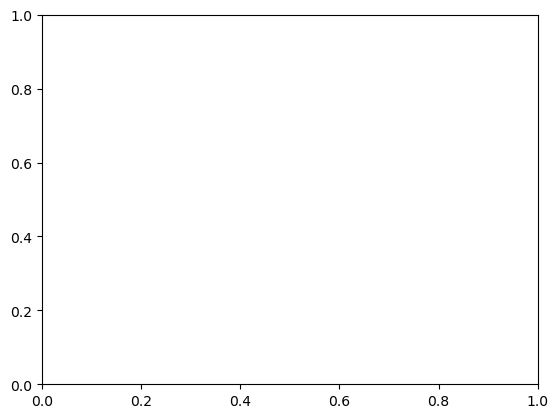

In [5]:
fig, ax = plt.subplots()  # a figure with a single Axes

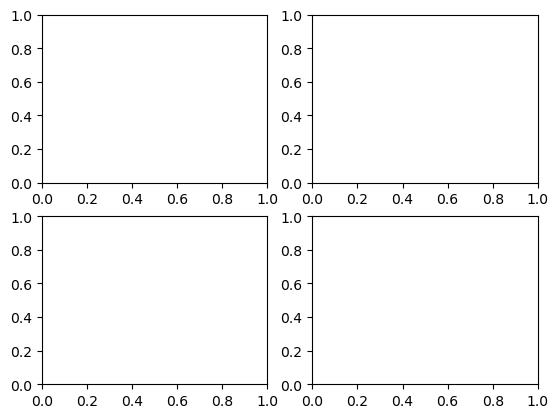

In [6]:
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

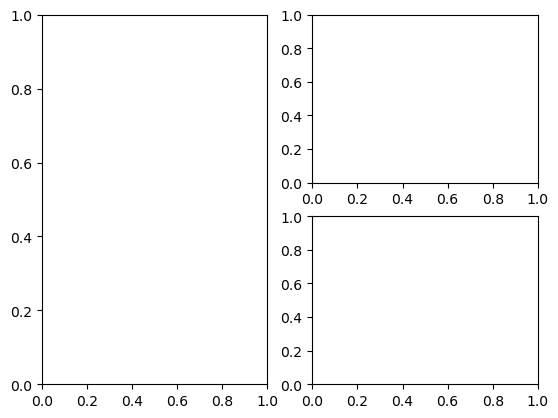

In [7]:
# a figure with one axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['left', 'right_top'],
                               ['left', 'right_bottom']])

#### Axes
An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes 
* two (or three in case of 3D) Axis objects (difference ax**i**s vs ax**e**s!)
* a title: `set_title()`
* an x-label: `set_xlabel()`
* a y-label: `set_ylabel()`

Text(0.5, 1.0, "I'm a title")

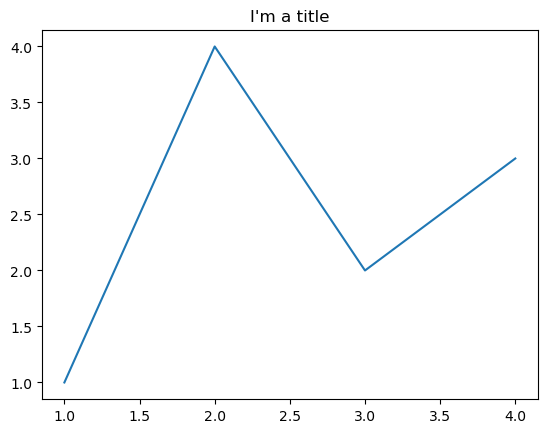

In [8]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4],[1,4,2,3])


ax.set_title("I'm a title")

#### Axis
These objects set the **scale** and **limits**. They generate:
* ticks (the marks on the Axis)
* ticklabels (strings labeling the ticks)
The location of the ticks is determined by a `Locator` object and the ticklabel strings are formated by a `Formatter`.

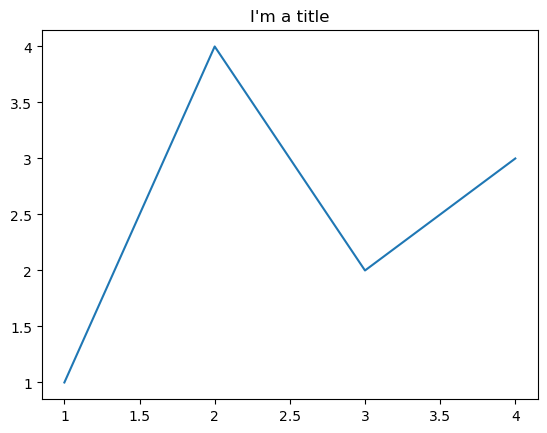

In [9]:
import matplotlib
import matplotlib.ticker
fig, ax = plt.subplots()
ax.plot([1,2,3,4],[1,4,2,3])
ax.set_title("I'm a title")

al = matplotlib.ticker.AutoLocator()
ax.xaxis.set_major_locator(al)
ax.xaxis.set_minor_locator(al)
ax.yaxis.set_major_locator(al)
ax.yaxis.set_minor_locator(al)

ef = matplotlib.ticker.EngFormatter() #format labels in engineering notation
ax.xaxis.set_major_formatter(ef)
ax.xaxis.set_minor_formatter(ef)
ax.yaxis.set_major_formatter(ef)
ax.yaxis.set_minor_formatter(ef)

#### Artist
Basically, everything visible on the Figure is an Artist (even Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collections objects, Patch objects, etc. When the Figure is rendered, all of the Artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another. 

#### Overview of the building blocks

In [ ]:
from PIL import Image
img = np.asarray(Image.open(r'matplotlib.png'))
imgplot = plt.imshow(img)

### 1.2 Coding styles

Two ways of using Matplotlib
* An **explicit** "Axes" interface that uses methods on a Figure or Axes object to create other Artists, and build a visualization step by step. This has also been called an "object-oriented" interface.
    - Building visualizations step by step
    - When adding visualizations, it should be clear to which Figure.
    - Used above
* An **implicit** "pyplot" interface that keeps track of the last Figure and Axes created, and adds Artists to the object it thinks the user wants. Use pyplot functions for plotting.
    - The pyplot module shadows most of the Axes plotting methods to give the equivalent of the above, where the creation of the Figure and Axes is done for the user
    - Convenient for interactive work or simple scripts
    - `gcf` to reference the current Figure
    - `gca`to reference the current Axes.
    - It 'remembers' the last Figure and Axes.

##### Explicit example

In [ ]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

##### Implicit example

In [ ]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

For this course, it mostly suffices to use the implicit method using pyplot. \
\
Check out the [Matplotlib documentation](https://matplotlib.org/stable/) for more functionality. 

## 2. Plotting with Matplotlib Pyplot

Let's first create a dataframe.

In [ ]:
# Sample data
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May'],
    'Sales': [100, 120, 150, 130, 140],
    'Expenses': [80, 90, 100, 110, 95]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Displaying the DataFrame
print("DataFrame:")
print(df)


### 2.1 Line graph

In [ ]:
# Create a figure of size (10,6)
plt.figure(figsize=(10, 6))

plt.show() # We only created the figure (See it as a blank page)

In [ ]:
# Plot the Sales data (y-axis) over time (x-axis), using a blue full line, with rounded markers size 8, width 2, labeled "Sales". 
plt.plot(df['Month'], df['Sales'], marker='o', color='blue', linestyle='-', linewidth=2, markersize=8, label='Sales')

# Plot the Expenses data (y-axis) over time (x-axis), using a dotted line, width 2 and squared markers of size 8. Label the graph 'Expenses'.
plt.plot(df['Month'], df['Expenses'], marker='s', color='red', linestyle='--', linewidth=2, markersize=8, label='Expenses')

# Add a title "Monthly Sales and Expenses" to the plot
plt.title('Monthly Sales and Expenses')

# Provide the label of the x-axis ("Month") and y-axis ("Amount")
plt.xlabel('Month')
plt.ylabel('Amount')

# Show the legend
plt.legend()

# Provide a grid for better readability of the values
plt.grid(True)

# Plot the figure
plt.show()

##### 💼 Make exercise **1. Counting birds** part 1


### 2.2 Bar plot

In [ ]:
# Create a figure of size (10,6)
plt.figure(figsize=(10, 6))

# Create a variable bar_width and set it to 0.35
bar_width = 0.35

# We create a range based on the number of months in the data
index = range(len(df['Month']))

# Plot the Sales data, using the index variable as x-axis values, make the bar blue and use the bar_width. Use an appropriate label.
plt.bar(index, df['Sales'], bar_width, color='blue', label='Sales')

# After creating the first set of bars, we also want to show the Expenses data. 
# We would like to put data of the same month next to each other. We used the values of 'index' to position the
# Sales data on the x-axis. As both bars are of the same width, using the values of 'index + bar_width' to position the red bar, ensures data for the same month is positioned next to each other.

# Plot the Expenses data in red 
plt.bar([i + bar_width for i in index], df['Expenses'], bar_width, color='red', label='Expenses')

# Give a title "Monthly Sales and Expenses (Bar Plot)" to the plot
plt.title('Monthly Sales and Expenses (Bar Plot)')

# Set the axis labels to "Month" and "Amount"
plt.xlabel('Month')
plt.ylabel('Amount')

# After positioning our bars, we want to place the ticks of the x-axis in the middle (so where both bars touch)
# The blue bar is positioned at i and the red one at i + bar_width, this means that the middle is positioned at i + bar_width/2
plt.xticks([i + bar_width / 2 for i in index], df['Month'])  # Set x-axis ticks

# Show the legend
plt.legend()  # Show legend

# Show the grid lines on the y-axis
plt.grid(axis='y')  # Show grid lines on y-axis

# Show the plot
plt.show()

##### 💼Make exercise **1. Counting Birds** part 2


### 2.3 Stacked bar plot

In [ ]:
# Create a figure of size (10,6)
plt.figure(figsize=(10, 6))  # Set figure size

# Plot the Sales data using blue bars. Provide a label.
plt.bar(df['Month'], df['Sales'], color='blue', label='Sales')

# Plot the Expenses data using a red bar on top of the Sales data. Provide a label.
plt.bar(df['Month'], df['Expenses'], bottom=df['Sales'], color='red', label='Expenses')

# Plot a title "Monthly Sales and Expenses (Stacked Bar Plot)"
plt.title('Monthly Sales and Expenses (Stacked Bar Plot)')

# Provide the right axis labels
plt.xlabel('Month')
plt.ylabel('Amount')

# Show the legend
plt.legend()  # Show legend

# Show grid lines on y-axis
plt.grid(axis='y') 

# Show the plot
plt.show()

##### 💼Make exercise **1. Counting Birds** part 3


### 2.4 Grouped bar plot

Below we have sales data of an electronics shop for the first semester. We can use a grouped bar chart to display the amount of sold items per category.

In [ ]:
#Create a dataframe
sales_data = {
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun"],
    "Laptops": [150, 180, 210, 230, 250, 270],
    "Smartphones": [200, 220, 250, 270, 300, 320],
    "Tablets": [100, 130, 160, 170, 180, 190]
}

electronics = pd.DataFrame(sales_data)
electronics

In [ ]:
#Grouped bar plot
plt.figure(figsize=(10,6))

bar_width = 0.2
x = range(len(electronics["Month"]))
laptops = plt.bar([i - bar_width for i in x], electronics["Laptops"], bar_width, color='blue', label='Laptops', align="center")
smartphones = plt.bar(x, electronics["Smartphones"], bar_width, color='purple', label='Smartphones', align="center")
tablets =  plt.bar([i + bar_width for i in x], electronics["Tablets"], bar_width, color='pink', label='Tablets', align="center")

#Let's add the values on top of the bars
plt.bar_label(laptops)
plt.bar_label(smartphones)
plt.bar_label(tablets)

plt.xticks(x, electronics["Month"])
plt.title("Electronics sales")

plt.xlabel("Month")
plt.ylabel("Amount")
plt.legend()
plt.show()

##### 💼Make exercise **1. Counting Birds** part 4